## This notebook is for the development of the function get_boundary_matrix:
 ***This function returns the matrix boundary before reduction***

In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

### Class: 


In [9]:
class SimplexTree(gd.SimplexTree):
    
    def get_boundary_matrix(self, sparse=False):
        
        """
        This function returns the matrix boundary before reduction.

        :param sparse: Indicate if the returned matrix should be sparse or dense.
        :param homology_coeff_field: The homology coefficient field. Must be a prime number. Default value is 2.
        :returns: The boundary matrix in sparse format by default.
        """

        filtration=self.get_filtration()  
        filtration_list=list(filtration)
        dim=len(filtration_list) # Dimension of the boundary matrix
        dics={} # Dictionary to store each simplex and corresponding index 

        # Initialize the matrix boundary based on whether sparse is True or False
        if sparse:
            Matrice_bord = lil_matrix((dim, dim), dtype=int) 
        else:
            Matrice_bord = np.zeros((dim, dim), dtype=int) 

        for i, (smpx,_) in  enumerate(filtration_list): # loop through the simplex and its order of apparition
            dics[tuple(smpx)]=i   # assign an index to each simplex in the filtration
            sign= 1 - 2 * (len(smpx) % 2) # \in {-1,1} provides the sign in the  alternate sum in the boundary.
            for n, _ in self.get_boundaries(smpx):
                index = dics.get(tuple(n))
                Matrice_bord[index, i] = sign
                sign = -sign  # alternate the sign moving into the next boundary of the simplex

        if sparse:
            Matrice_bord = Matrice_bord.tocsr() # Convert the boundary matrix to compressed sparse format if sparse is True

        return Matrice_bord

In [2]:
st=gd.SimplexTree()
st.insert([0])
st.insert([1],0.01)
st.insert([2],0.02)
st.insert([3],0.03)
st.insert([1,3],0.04)
st.insert([5],0.05)
st.insert([6],0.06)
st.insert([7],0.07)
st.insert([8],0.08)
st.insert([1,8],0.09)
st.insert([1,7],0.10)
st.insert([11],0.11)
st.insert([12],0.12)
st.insert([8,11],0.13)
st.insert([11,12],0.14)
st.insert([3,12],0.15)
st.insert([7,12],0.16)
st.insert([3,11],0.17)
st.insert([3,11,12],0.18)
st.insert([0,12],0.19)
st.insert([0,7],0.20)
st.insert([6,7],0.205)
st.insert([3,7],0.21)
st.insert([1,3,7],0.22)
st.insert([0,7,12],0.23)
st.insert([3,8],0.24)
st.insert([3,7,12],0.25)
st.insert([1,3,8],26)
st.insert([3,8,11],27)
st.insert([2,5],28)
st.insert([5,6],29)
st.insert([2,6],30)
st.insert([2,5,6],31)

True

In [3]:
def get_boundary_matrix(self, sparse=False):

        filtration=self.get_filtration()  
        filtration_list=list(filtration)
        dim=len(filtration_list) # Dimension of the boundary matrix
        dics={} # Dictionary to store each simplex and corresponding index 

        # Initialize the matrix boundary based on whether sparse is True or False
        if sparse:
            Matrice_bord = lil_matrix((dim, dim), dtype=int) 
        else:
            Matrice_bord = np.zeros((dim, dim), dtype=int) 

        for i, (smpx,_) in  enumerate(filtration_list): #loop through the simplex and its order of apparition
            dics[tuple(smpx)]=i   # assign an index to each simplex in the filtration
            sign= 1 - 2 * (len(smpx) % 2)  # Depending on the cohomology, the sign will altern with 1 for pair symplex and -1 for impair
            for n, _ in self.get_boundaries(smpx): 
                index = dics.get(tuple(n))
                Matrice_bord[index, i] = sign
                sign = -sign # altern the sign regarding the direction in the simplex

        if sparse:
            Matrice_bord = Matrice_bord.tocsr() # Convert the boundary matrix to compressed sparse format if sparse is True

        return Matrice_bord

In [4]:
test_unitaire=get_boundary_matrix(st)

In [5]:
def find_indices_modified(matrix):
    indices_dict = {}
    for col_idx, column in enumerate(matrix.T):
        indices_1 = [i for i, val in enumerate(column) if val == 1]
        indices_minus_1 = [i for i, val in enumerate(column) if val == -1]
        indices_dict[col_idx] = {'1': indices_1, '-1': indices_minus_1}
    return indices_dict


In [6]:
find_indices_modified(test_unitaire)

{0: {'1': [], '-1': []},
 1: {'1': [], '-1': []},
 2: {'1': [], '-1': []},
 3: {'1': [], '-1': []},
 4: {'1': [1], '-1': [3]},
 5: {'1': [], '-1': []},
 6: {'1': [], '-1': []},
 7: {'1': [], '-1': []},
 8: {'1': [], '-1': []},
 9: {'1': [1], '-1': [8]},
 10: {'1': [1], '-1': [7]},
 11: {'1': [], '-1': []},
 12: {'1': [], '-1': []},
 13: {'1': [8], '-1': [11]},
 14: {'1': [11], '-1': [12]},
 15: {'1': [3], '-1': [12]},
 16: {'1': [7], '-1': [12]},
 17: {'1': [3], '-1': [11]},
 18: {'1': [15], '-1': [14, 17]},
 19: {'1': [0], '-1': [12]},
 20: {'1': [0], '-1': [7]},
 21: {'1': [6], '-1': [7]},
 22: {'1': [3], '-1': [7]},
 23: {'1': [10], '-1': [4, 22]},
 24: {'1': [19], '-1': [16, 20]},
 25: {'1': [3], '-1': [8]},
 26: {'1': [15], '-1': [16, 22]},
 27: {'1': [9], '-1': [4, 25]},
 28: {'1': [17], '-1': [13, 25]},
 29: {'1': [2], '-1': [5]},
 30: {'1': [5], '-1': [6]},
 31: {'1': [2], '-1': [6]},
 32: {'1': [31], '-1': [29, 30]}}

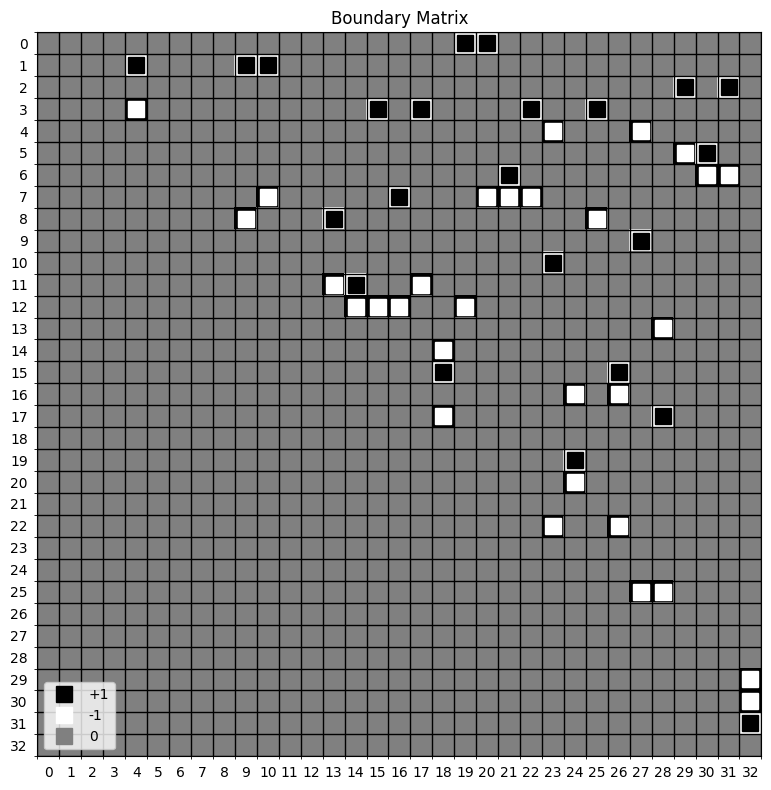

In [8]:
import matplotlib.pyplot as plt
import numpy as np

dense_matrix = test_unitaire

# Create a bigger figure with a grid-like structure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_facecolor('lightgray')

# Plot the dense matrix with a grayscale colormap
ax.imshow(dense_matrix, cmap='gray')

# Get the indices where the values are +1 and -1
indices_1 = np.argwhere(dense_matrix == 1)
indices_minus_1 = np.argwhere(dense_matrix == -1)
indices_0 = np.argwhere(dense_matrix == 0)

# Highlight the positions of +1 and -1 values with black and white squares, respectively
ax.plot(indices_1[:, 1], indices_1[:, 0], 's', markersize=12, label='+1', color='black')
ax.plot(indices_minus_1[:, 1], indices_minus_1[:, 0], 's', markersize=12, label='-1', color='white')
ax.plot(indices_0[:, 1], indices_0[:, 0], 's', markersize=12, label='0', color='gray')

# Add gridlines
ax.set_xticks(np.arange(dense_matrix.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(dense_matrix.shape[0]+1)-0.5, minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Set the tick labels and remove ticks
ax.set_xticks(np.arange(dense_matrix.shape[1]))
ax.set_yticks(np.arange(dense_matrix.shape[0]))
ax.set_xticklabels(np.arange(0, dense_matrix.shape[1] ))
ax.set_yticklabels(np.arange(0, dense_matrix.shape[0] ))
ax.tick_params(bottom=False, left=False)

# Add a legend
ax.legend(loc=3, fontsize=10)

# Set the title
ax.set_title('Boundary Matrix')

# Show the plot
plt.tight_layout()
plt.savefig('image', bbox_inches='tight')

plt.show()

